In [2]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import os

# Grid Based Initial Conditions

We consider a discrete 3D guassian field $\rho(\mathbf{x})$ where we denote $\mathbf{x} = (x_0, x_1, x_2)$. We can obtain the overdensity field $\delta(\mathbf{x})$ 

$$
\delta(x_0, x_1, z_2) = \frac{\rho(x_0, x_1, x_2) - \langle \rho(x_0, x_1, x_2) \rangle}{\langle \rho(x_0, x_1, x_2) \rangle}
$$

which is a zero mean field, where $\langle \rho(x_0, x_1, x_2) \rangle$ is the mean of the field. Let us assume looking at a Universe contained in a cubic volume with equal sides of length $L$, furtehrmore we imageine that the density field is periodic. We can then define the density field in terms of the inverse discrete furier transform as

$$
\delta(x_0, x_1, x_2) = \frac{1}{L^3} \sum_{k_0=0}^{L-1} \sum_{k_1=0}^{L-1} \sum_{k_2=0}^{L-1} \delta_k(k_0, k_1, k_2) e^{i k_0 x_0 + k_1 x_1 + k_2 x_2},
$$

which we write in a more compact form as

$$
\delta(\mathbf{x}) =  \frac{1}{L^3} \sum_{\mathbf{k}} \delta(\mathbf{k}) e^{i\mathbf{k}\cdot \mathbf{x}}.
$$

We call the $\sigma_k(\mathbf{k})$ the Fourier modes of the field, the vector $\mathbf{k}$ is the wavevector defined as

$$
\mathbf{k} = (k_0, k_1, k2) =  \frac{2\pi}{L} (x_0, x_1, x_2).
$$ 

The Fourier modes are related to the density field by the furier transform
$$
\delta(\mathbf{k}) = \sum_{\mathbf{x}} \delta(\mathbf{x}) e^{-i\mathbf{k}\cdot \mathbf{x}}
$$

where sum over all the grid points in the box.

## Autocorrelation Function

A commonly used measure of clustering is the second momment of the density field, which is also called autocorrelation function

$$
\xi(r) = \langle \delta(\mathbf{x}) \delta(\mathbf{x} + \mathbf{r}) \rangle.
$$

This means we sum over all pairs of points in the box which are separated by a distance $r$. Hence we can rewrite the autocorrelation function in the discrete setting as

$$
\xi(r) = \frac{1}{L^3} \sum_{\mathbf{x}} \delta(\mathbf{x}) \delta(\mathbf{x} + \mathbf{r}).
$$

The Power Spectrum is defined as the Fourier transform of the autocorrelation function

$$
P(k) = \sum_{\mathbf{x}} \xi(x) e^{-i\mathbf{k}\cdot \mathbf{x}}.
$$

I dont get the derivation of the power spectrum?

The power spectrum is 

$$
P(k) = \frac{1}{L^3} \langle | \sigma(\mathbf{k}) |^2 \rangle.
$$

(-0.5, 99.5, 99.5, -0.5)

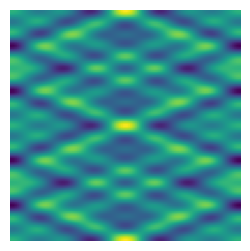

In [73]:
# Lets generate some 2D data
N = 100
x, y = jnp.meshgrid(jnp.linspace(-1, 1, N), jnp.linspace(-1, 1, N))
rho = jnp.cos(2*jnp.pi*x)*jnp.cos(4*jnp.pi*y) +\
        jnp.cos(4*jnp.pi*x)*jnp.cos(10*jnp.pi*y) +\
        jnp.cos(3*jnp.pi*x)*jnp.cos(6*jnp.pi*y)

# Lets plot the data
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.imshow(rho, cmap='viridis')
axs.axis('off')

(-0.5, 99.5, 99.5, -0.5)

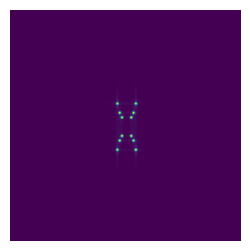

In [77]:
# computhe the overdensity
delta = (rho - rho.mean())/rho.mean()

# compute the fft
delta_k = jnp.fft.fft2(delta)

# shift the fft
delta_k = jnp.fft.fftshift(delta_k)

# plot delta_k
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.imshow(jnp.abs(delta_k), cmap='viridis')
axs.axis('off')


In [83]:
# compute the power spectrum
kx, ky = jnp.meshgrid(jnp.linspace(0, N), jnp.linspace(0, N))
k = jnp.sqrt(kx**2 + ky**2)

n_bins = 20
print(k)
bin_index = jnp.digitize(k, jnp.linspace(0, N, n_bins+1))
print(bin_index)

power = jnp.linspace(0, n_bins, n_bins+1)

# put the power in the bins
for i in range(n_bins):
    power[i] = jnp.sum(delta_k[bin_index == i])

# count the number of modes in each bin
n_modes = jnp.zeros(n_bins)
for i in range(n_bins):
    n_modes[i] = jnp.sum(bin_index == i)

# compute the average power
power = power/n_modes

# plot the power spectrum
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.plot(power)

[[  0.          2.0408163   4.0816326 ...  95.918365   97.95918
  100.       ]
 [  2.0408163   2.8861501   4.563404  ...  95.94008    97.98044
  100.02082  ]
 [  4.0816326   4.563404    5.7723002 ...  96.00517    98.04418
  100.08326  ]
 ...
 [ 95.918365   95.94008    96.00517   ... 135.64905   137.09973
  138.56526  ]
 [ 97.95918    97.98044    98.04418   ... 137.09973   138.5352
  139.98572  ]
 [100.        100.02082   100.08326   ... 138.56526   139.98572
  141.42136  ]]
[[ 1  1  1 ... 20 20 21]
 [ 1  1  1 ... 20 20 21]
 [ 1  1  2 ... 20 20 21]
 ...
 [20 20 20 ... 21 21 21]
 [20 20 20 ... 21 21 21]
 [21 21 21 ... 21 21 21]]


IndexError: boolean index did not match shape of indexed array in index 0: got (50, 50), expected (100, 100)